In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Khai báo thư viện - các biến
from keras_preprocessing.image    import load_img #tiền xử lý ảnh, tải ảnh từ đường dẫn
from keras_preprocessing.image    import img_to_array #chuyển ảnh sang mảng numpy
from keras.models                 import load_model #tải mô hình đã đc huấn luyện từ ảnh đã lưu
from keras.utils                  import np_utils
from keras.datasets               import cifar10 #tải ảnh từ tệp cifar 10, 50000 anhrcos kích thước 32*32, 10 lớp
from keras.utils                  import np_utils
from keras.models                 import Sequential #thư viên giúp xếp chồng các lớp trên nhau
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot          as     plt
import numpy                      as     np

In [ ]:

x_train = np.zeros((642,200,200,3)) #mảng 4 chiều với 642 mẫu hình, mỗi ảnh có 200*200, 3 kênh màu RGB
x_test = np.zeros((61,200,200,3))

In [ ]:
# Gán giá trị cho y_train, y_test,np_utils.to_categorical để 
#chuyển đổi thành dạng one-hot vector trong quá trình tiền xử lý dữ liệu.
y_train = [0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,

           1,1,1,1,1,1,1,1,1,1,
           
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,
           1,1,

           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,

           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,

           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,

           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,

           2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,]

y_test = [0,0,0,0,0,0,0,0,0,0,0,
          1,1,1,1,1,1,1,1,1,1,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2]

In [ ]:
for i in range(125):
  x_train[i] = load_img('/content/drive/MyDrive/Last term/Breast Cancer/train/Benign ('+ str(i+1)+').png', target_size=(200,200))
  x_train[i] = img_to_array(x_train[i]) 
  
for i in range(126,227):
  x_train[i] = load_img('/content/drive/MyDrive/Last term/Breast Cancer/train/malignant ('+ str(i+1-127)+').png', target_size=(200,200))
  x_train[i] = img_to_array(x_train[i])  

for i in range(228,642):
  x_train[i] = load_img('/content/drive/MyDrive/Last term/Breast Cancer/train/normal ('+ str(i+1-229)+').png', target_size=(200,200))
  x_train[i] = img_to_array(x_train[i]) 

for i in range(10):
  x_test[i] = load_img('/content/drive/MyDrive/Last term/Breast Cancer/test/benign ('+ str(i+1)+').png', target_size=(200,200))
  x_test[i] = img_to_array(x_test[i]) 

for i in range(11,20):
  x_test[i] = load_img('/content/drive/MyDrive/Last term/Breast Cancer/test/malignant ('+ str(i+1-11)+').png', target_size=(200,200))
  x_test[i] = img_to_array(x_test[i]) 

for i in range(21,60):
  x_test[i] = load_img('/content/drive/MyDrive/Last term/Breast Cancer/test/normal ('+ str(i+1-21)+').png', target_size=(200,200))
  x_test[i] = img_to_array(x_test[i]) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train = x_train.reshape(642,200, 200,3)
x_test = x_test.reshape(61,200, 200,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255 # Chia từ ảnh màu thành ảnh xám, chuyển giá trị pixel từ 0-255 sang 0-1
x_test/=255

y_train = np_utils.to_categorical(y_train,3)
y_test = np_utils.to_categorical(y_test,3)
#dạng one-hot vector bằng hàm np_utils.to_categorical. 
#Việc này là cần thiết để biểu diễn nhãn dưới dạng vector nhị phân, 

In [ ]:
# Xây dựng model bằng CNN bằng Sequential của keras
model = Sequential()
#32 bộ lọc, kích thước 3*3, nhận inout 200*200*3
model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', input_shape=(200, 200, 3)))
#optimize đầu ra của lớp trước, tặng tốc độ hội tụ
model.add(BatchNormalization())
#lớp thứ 2, same
model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())
#lấy mẫu tối đa các kích thước 2*2 để giảm size input
#giảm độ phức tạp và tránh overfiting
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
#tiếp tục thực hiện bộ lọc tăng dần để tìm ra sự đặc trưng
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten()) #chuyển từ matran 3 chiều sang 1 chiều, làm phẳng
model.add(Dense(128, activation='relu', 
                kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))	
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_35 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_36 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                      

In [ ]:
# Training
opt=SGD(learning_rate=0.01,momentum=0.9)
#tối ưu hóa với tỉ lệ học 0.001, mometum là trọng số
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test),verbose=1)
#dùng validation để đánh giá hiệu suất
# Save model
model.save('/content/drive/MyDrive/Last term/breastcancer9.h5')

Epoch 1/100
21/21 [==============================] - 6s 195ms/step - loss: 1.4748 - accuracy: 0.4003 - val_loss: 1.9193 - val_accuracy: 0.3443
Epoch 2/100
21/21 [==============================] - 4s 184ms/step - loss: 1.0876 - accuracy: 0.5654 - val_loss: 1.0635 - val_accuracy: 0.5738
Epoch 3/100
21/21 [==============================] - 4s 184ms/step - loss: 1.0463 - accuracy: 0.5794 - val_loss: 0.9749 - val_accuracy: 0.6230
Epoch 4/100
21/21 [==============================] - 4s 185ms/step - loss: 1.0257 - accuracy: 0.6075 - val_loss: 0.9753 - val_accuracy: 0.6557
Epoch 5/100
21/21 [==============================] - 4s 186ms/step - loss: 1.0148 - accuracy: 0.5872 - val_loss: 0.9717 - val_accuracy: 0.6557
Epoch 6/100
21/21 [==============================] - 4s 183ms/step - loss: 0.9326 - accuracy: 0.6121 - val_loss: 1.0100 - val_accuracy: 0.6393
Epoch 7/100
21/21 [==============================] - 4s 184ms/step - loss: 0.9694 - accuracy: 0.6277 - val_loss: 1.0787 - val_accuracy: 0.4426

Test loss: 0.21875382959842682
Test accuracy 0.9672130942344666


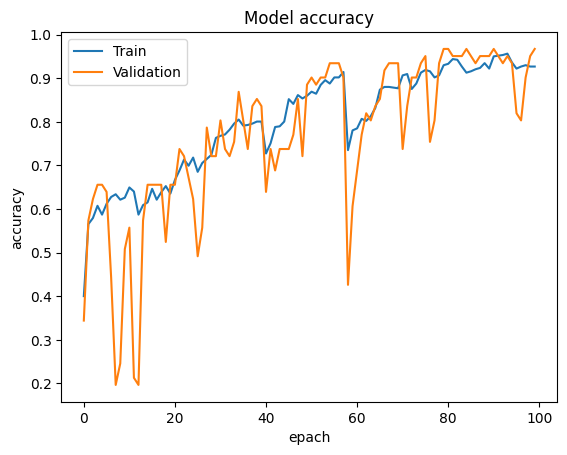

In [ ]:
#Vẽ đồ thị
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epach')
plt.legend(['Train','Validation'],loc='upper left')
plt.show

score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

1/1 [==============================] - 0s 37ms/step
Giá trị dự đoán: Malignant


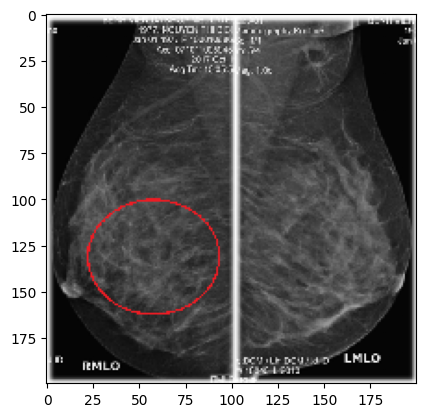

In [ ]:
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
#from keras.models import load_model
img3 = load_img('/content/test2.jpg', target_size=(200, 200))
img3 = img_to_array(img3)
img3 = img3.reshape(1, 200, 200, 3)
img3 = img3.astype('float32')
img3 = img3 / 255.0
# load model
model_final = load_model('/content/drive/MyDrive/Last term/breastcancer9.h5')
plt.imshow(img3.reshape(200,200,3), cmap='gray')
# predict the class
result = model.predict(img3.reshape(1,200,200,3))
if np.argmax(result) == 0:
   k = "Begnign"
elif np.argmax(result) == 1:
   k = "Malignant"
else:
   k = "Normal"
print('Giá trị dự đoán:', k)
plt.show()